### California Housing Price Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing

### Load Data set

In [6]:
california=fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Converting into DataFrame

In [8]:
dataset = pd.DataFrame(california.data, columns=california.feature_names)
dataset['price'] = california.target

### Exploratory Data Analysis

In [9]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

In [10]:
print(dataset.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

### Checking Correlation with price

In [14]:
dataset.corr()['price'].sort_values(ascending=False)

price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: price, dtype: float64

### Distribution Plots

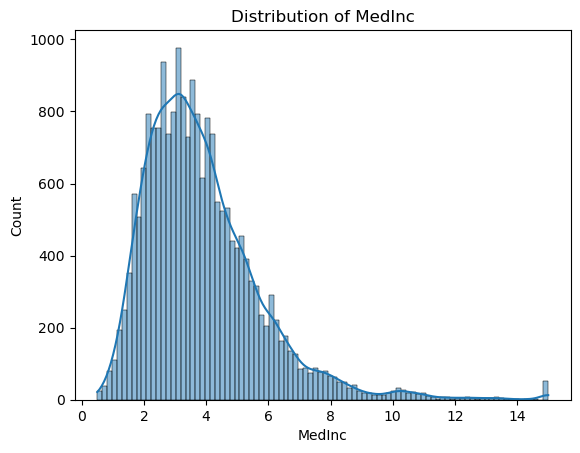

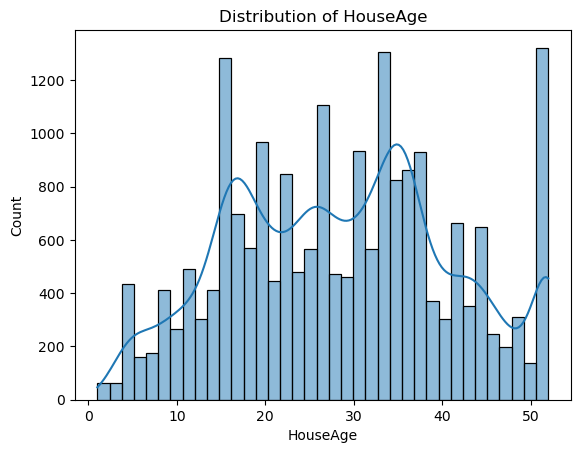

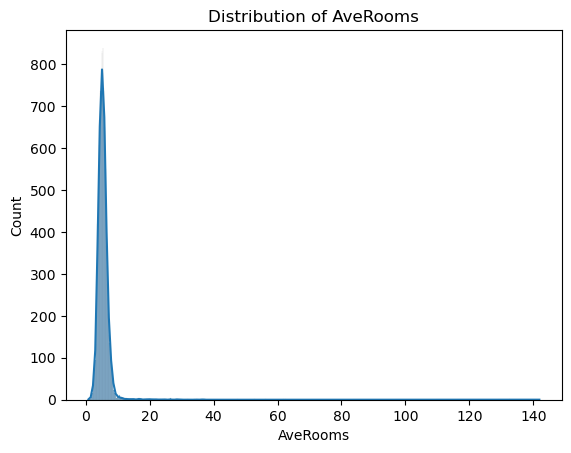

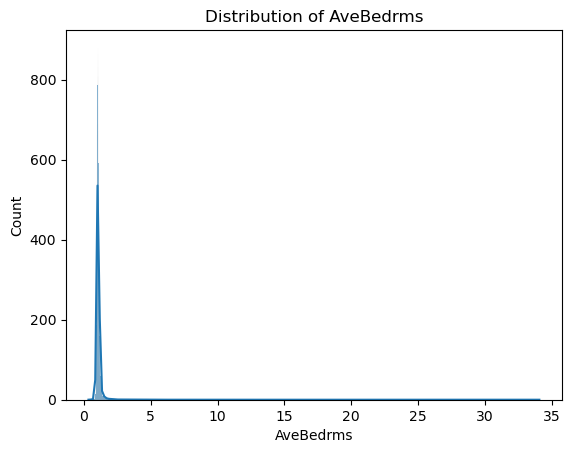

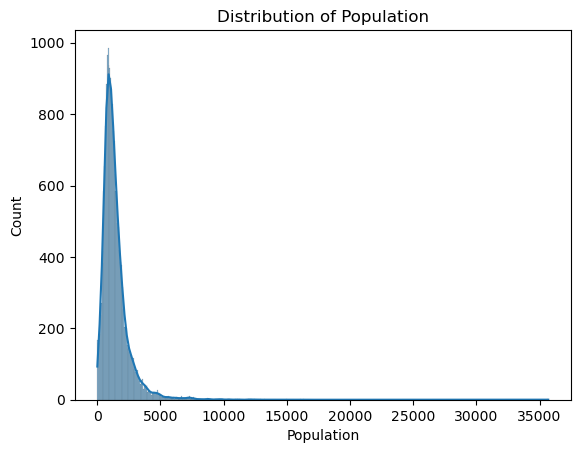

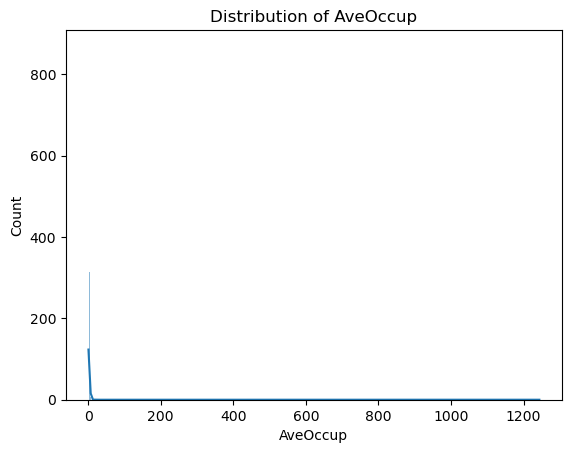

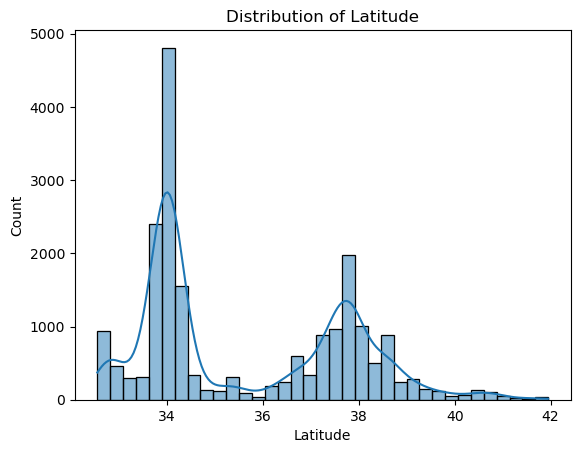

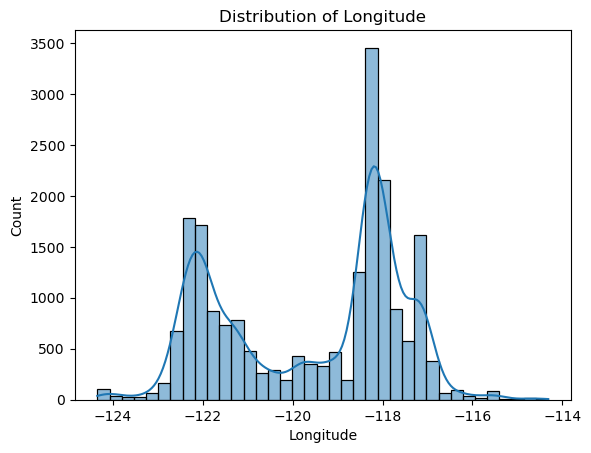

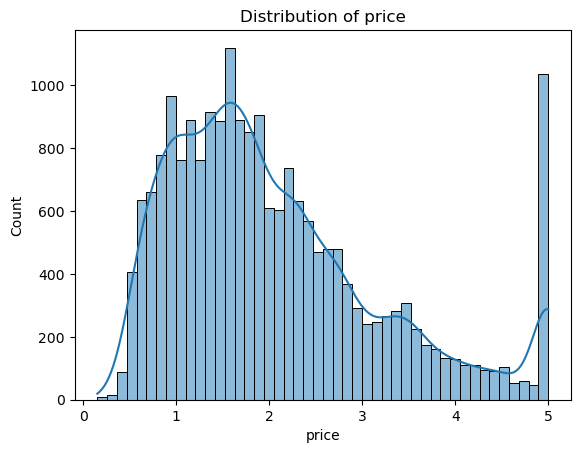

In [17]:
for col in dataset.columns:
    sns.histplot(dataset[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

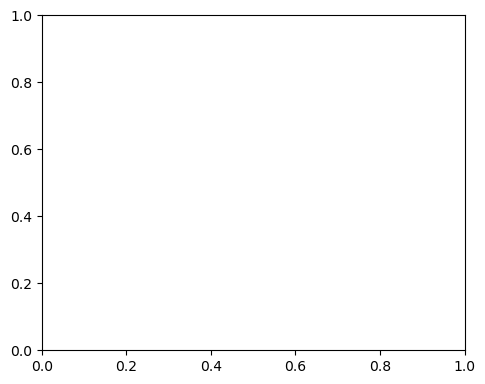

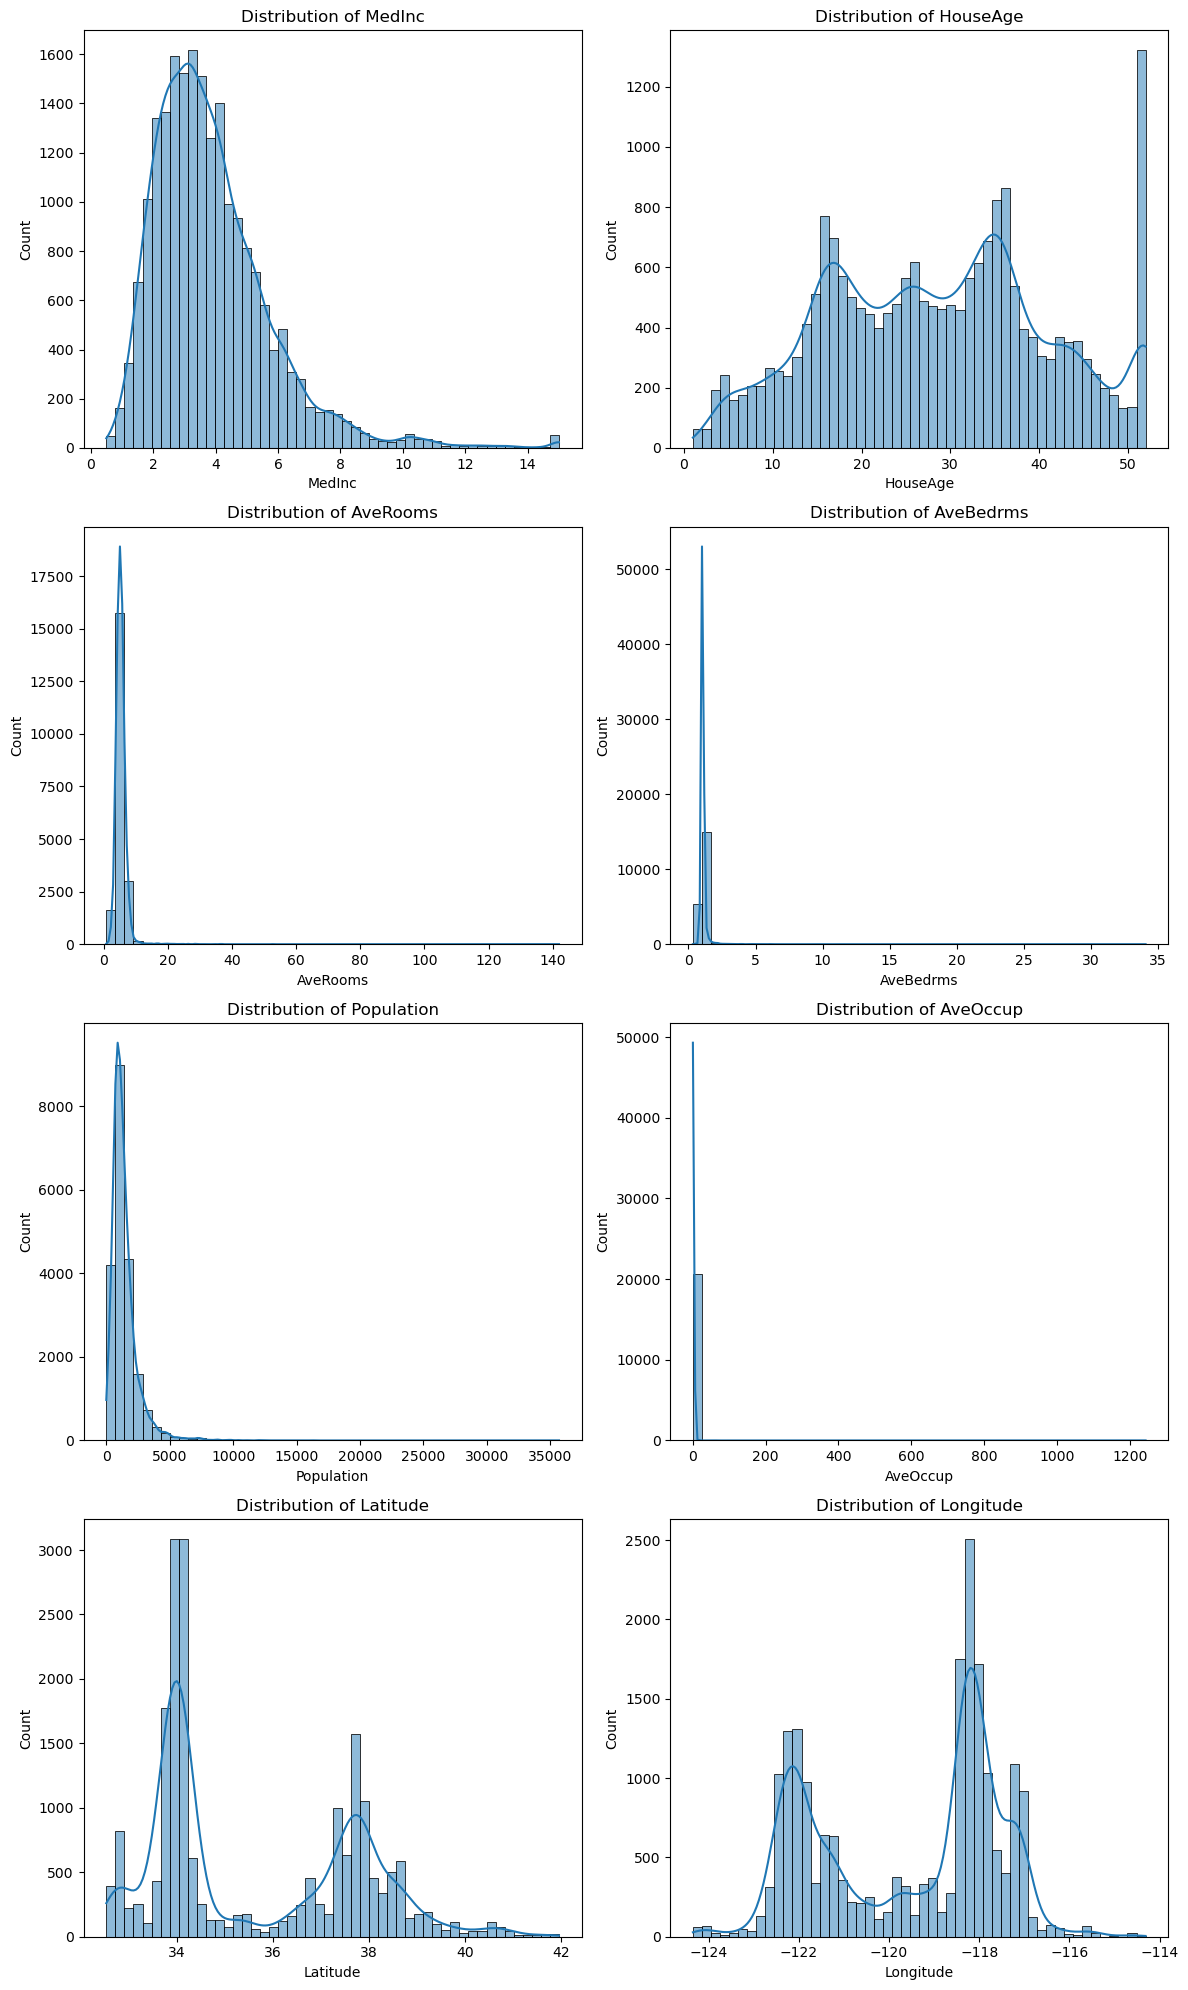

In [20]:
cols = dataset.columns[:-1] 

plt.figure(figsize=(12, 20))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(dataset[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Boxplots for Outlier Detection

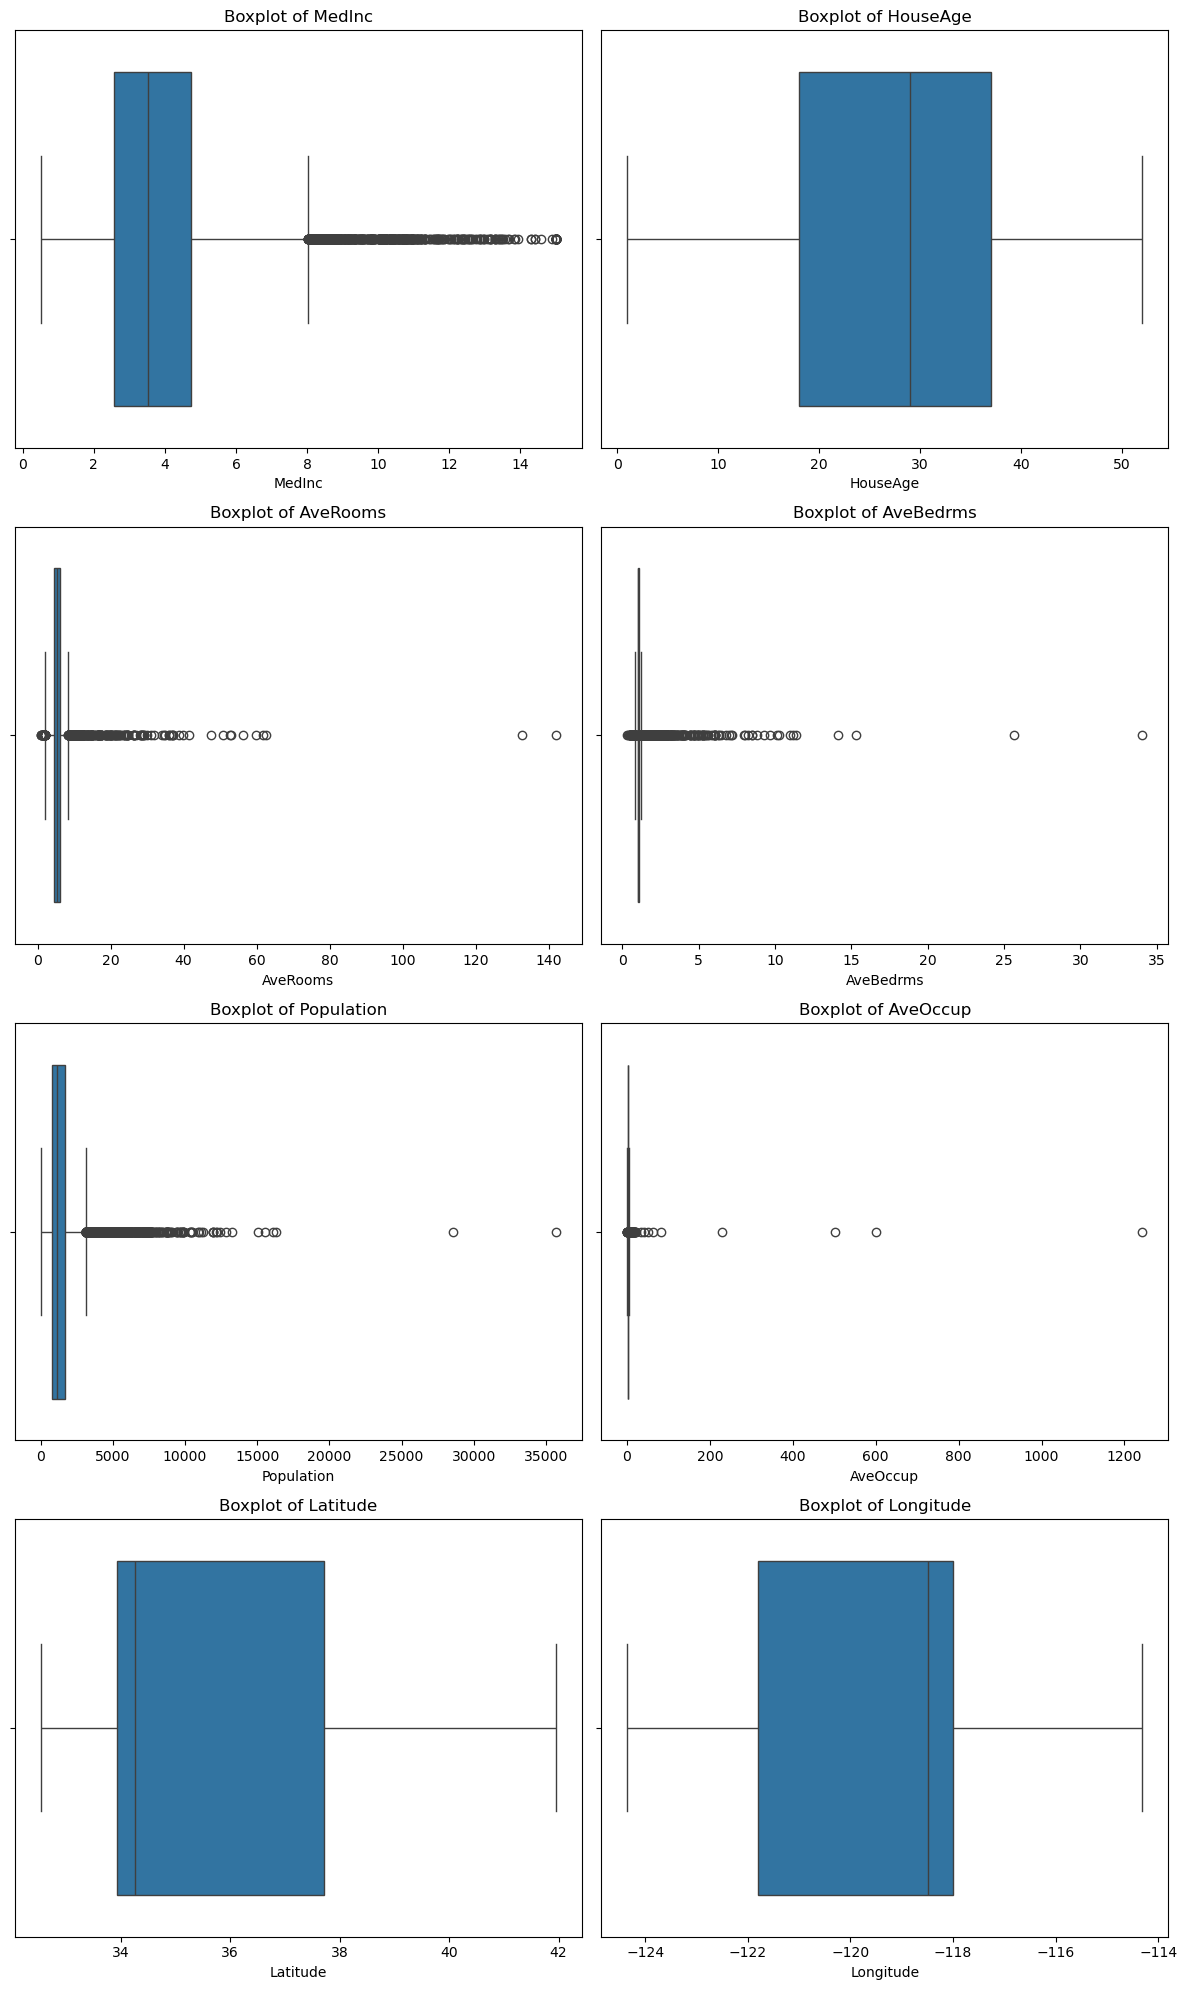

In [21]:
plt.figure(figsize=(12, 20))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=dataset[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Capping Outliers using IQR methos

In [23]:
for col in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    dataset[col] = dataset[col].clip(upper=upper_limit)

In [24]:
def clip_outliers(col, upper_percentile=99):
    upper_limit = np.percentile(dataset[col], upper_percentile)
    dataset[col] = dataset[col].clip(upper=upper_limit)

In [25]:
clip_outliers('AveRooms')
clip_outliers('AveBedrms')
clip_outliers('Population')
clip_outliers('AveOccup')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Data Splitting

In [27]:
X = dataset.drop('price', axis=1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [29]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [34]:
y_pred = rf.predict(X_test)
comparison_dataset = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_dataset.head(10))

    Actual  Predicted
0  0.47700   0.497630
1  0.45800   0.728630
2  5.00001   4.927357
3  2.18600   2.508490
4  2.78000   2.270990
5  1.58700   1.669820
6  1.98200   2.360210
7  1.57500   1.666800
8  3.40000   2.746031
9  4.46600   4.906148


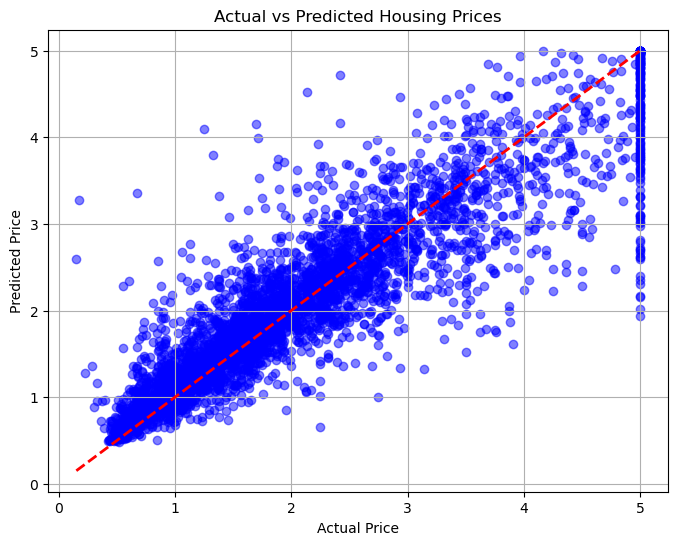

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.grid(True)
plt.show()

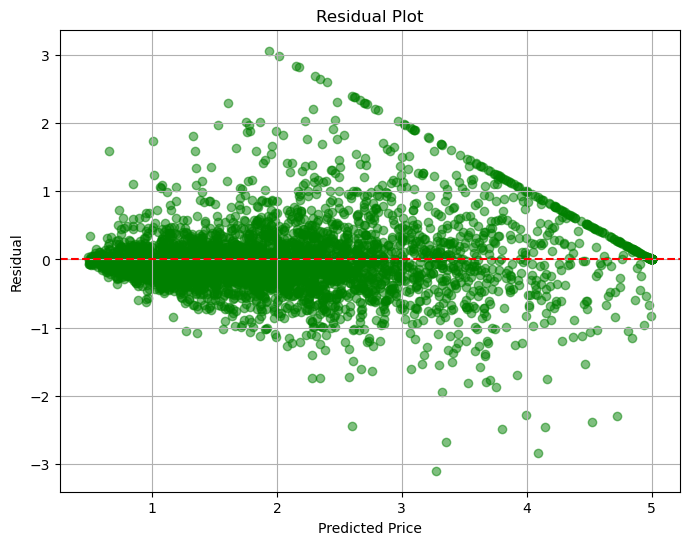

In [36]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

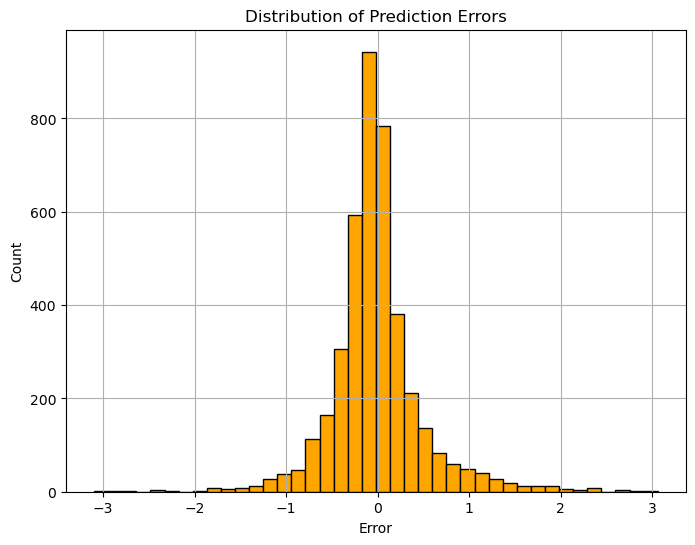

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=40, color='orange', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [38]:
lr_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': lr_preds
})

print(lr_results.head(10))

    Actual  Predicted
0  0.47700   0.328725
1  0.45800   2.006714
2  5.00001   3.354095
3  2.18600   2.620594
4  2.78000   2.712483
5  1.58700   2.048897
6  1.98200   2.655122
7  1.57500   1.853598
8  3.40000   2.965234
9  4.46600   3.946382


In [39]:
def evaluate(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print()

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)

--- Linear Regression ---
RMSE: 0.6767598123193934
R2 Score: 0.6504878620524963

--- Random Forest ---
RMSE: 0.5060498952955533
R2 Score: 0.8045751358690991



In [40]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 3.0 MB/s eta 0:00:51
    --------------------------------------- 2.1/150.0 MB 3.8 MB/s eta 0:00:40
    --------------------------------------- 3.1/150.0 MB 4.3 MB/s eta 0:00:35
   - -------------------------------------- 4.5/150.0 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 5.8/150.0 MB 5.0 MB/s eta 0:00:30
   - -------------------------------------- 6.6/150.0 MB 4.9 MB/s eta 0:00:30
   - -------------------------------------- 7.3/150.0 MB 4.6 MB/s eta 0:00:31
   -- ------------------------------------- 8.1/150.0 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 9.2/150.0 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 10.5/150.0 MB 4.7 MB/s eta 0:00:30
   --

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [42]:
##Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)
gbr_preds = gbr.predict(X_test_scaled)

In [43]:
##XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb.predict(X_test_scaled)

In [44]:
gbr_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted (GBR)': gbr_preds
})

xgb_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted (XGBoost)': xgb_preds
})

print("Gradient Boosting:")
print(gbr_results.head(10))

print("\nXGBoost:")
print(xgb_results.head(10))

Gradient Boosting:
    Actual  Predicted (GBR)
0  0.47700         0.518385
1  0.45800         1.100066
2  5.00001         4.089894
3  2.18600         2.528681
4  2.78000         2.252353
5  1.58700         1.683819
6  1.98200         2.339896
7  1.57500         1.707878
8  3.40000         3.117911
9  4.46600         4.298480

XGBoost:
    Actual  Predicted (XGBoost)
0  0.47700             0.524333
1  0.45800             0.550468
2  5.00001             5.306833
3  2.18600             2.587358
4  2.78000             2.386428
5  1.58700             1.476043
6  1.98200             2.215612
7  1.57500             1.607196
8  3.40000             2.511678
9  4.46600             5.002977


In [46]:
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_preds))
gbr_r2 = r2_score(y_test, gbr_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)


print("--- Gradient Boosting ---")
print(f"RMSE: {gbr_rmse}")
print(f"R2 Score: {gbr_r2}")

print("\n--- XGBoost ---")
print(f"RMSE: {xgb_rmse}")
print(f"R2 Score: {xgb_r2}")

--- Gradient Boosting ---
RMSE: 0.5395280490197752
R2 Score: 0.777862850062393

--- XGBoost ---
RMSE: 0.4692958743404844
R2 Score: 0.8319313883451491


### Model Comparision

In [48]:
comparison_dataset = pd.DataFrame({
    'Actual': y_test.values,
    'LinearRegression': lr_preds,
    'RandomForest': rf_preds,
    'GradientBoosting': gbr_preds,
    'XGBoost': xgb_preds
})

print(comparison_dataset.head(10))

    Actual  LinearRegression  RandomForest  GradientBoosting   XGBoost
0  0.47700          0.328725      0.497630          0.518385  0.524333
1  0.45800          2.006714      0.728630          1.100066  0.550468
2  5.00001          3.354095      4.927357          4.089894  5.306833
3  2.18600          2.620594      2.508490          2.528681  2.587358
4  2.78000          2.712483      2.270990          2.252353  2.386428
5  1.58700          2.048897      1.669820          1.683819  1.476043
6  1.98200          2.655122      2.360210          2.339896  2.215612
7  1.57500          1.853598      1.666800          1.707878  1.607196
8  3.40000          2.965234      2.746031          3.117911  2.511678
9  4.46600          3.946382      4.906148          4.298480  5.002977


In [50]:
models = {
    "Linear Regression": lr_preds,
    "Random Forest": rf_preds,
    "Gradient Boosting": gbr_preds,
    "XGBoost": xgb_preds
}


for name, preds in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"--- {name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")

--- Linear Regression ---
RMSE: 0.6768
R2 Score: 0.6505

--- Random Forest ---
RMSE: 0.5060
R2 Score: 0.8046

--- Gradient Boosting ---
RMSE: 0.5395
R2 Score: 0.7779

--- XGBoost ---
RMSE: 0.4693
R2 Score: 0.8319



In [51]:
from sklearn.model_selection import GridSearchCV

### HyperParameter Tuning - RandomForest

In [53]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=rf_params,
                       cv=3,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1,
                       verbose=1)

grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best RF Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [54]:
y_pred_rf_best = best_rf.predict(X_test_scaled)

In [55]:
predicted_dataset = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf_best
})
print(predicted_dataset.head(10))

    Actual  Predicted
0  0.47700   0.499505
1  0.45800   0.790660
2  5.00001   4.852857
3  2.18600   2.547395
4  2.78000   2.274920
5  1.58700   1.691100
6  1.98200   2.352380
7  1.57500   1.664125
8  3.40000   2.718820
9  4.46600   4.836703


In [56]:
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf_best))
r2_rf_best = r2_score(y_test, y_pred_rf_best)
print("--- Tuned Random Forest ---")
print("RMSE:", rmse_rf_best)
print("R2 Score:", r2_rf_best)

--- Tuned Random Forest ---
RMSE: 0.49124152899109086
R2 Score: 0.8158450958345449


### HyperParameter Tuning - XGBoost

In [57]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

grid_xgb = GridSearchCV(estimator=xgb,
                        param_grid=xgb_params,
                        cv=3,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1,
                        verbose=1)

grid_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_xgb.best_estimator_
print("Best XGB Parameters:", grid_xgb.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


xgb_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': xgb_preds
})
print(xgb_results.head(10))

In [61]:
xgb_preds = best_xgb.predict(X_test_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

print("\n--- Tuned XGBoost ---")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R2 Score: {xgb_r2:.4f}")


--- Tuned XGBoost ---
RMSE: 0.4672
R2 Score: 0.8334


### Comparing all models 

In [65]:
model_results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'R2 Score': [
        r2_score(y_test, lr_preds),
        r2_score(y_test, rf_preds),
        r2_score(y_test, gbr_preds),
        r2_score(y_test, xgb_preds)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, lr_preds)),
        np.sqrt(mean_squared_error(y_test, rf_preds)),
        np.sqrt(mean_squared_error(y_test, gbr_preds)),
        np.sqrt(mean_squared_error(y_test, xgb_preds))
    ]
}

comparison_dataset = pd.DataFrame(model_results)
print(comparison_dataset)

               Model  R2 Score      RMSE
0  Linear Regression  0.650488  0.676760
1      Random Forest  0.804575  0.506050
2  Gradient Boosting  0.777863  0.539528
3            XGBoost  0.833439  0.467186


### Conclusion

In [69]:
print("\nConclusion:")
print("All four models have been trained and compared. Ensemble models like Random Forest and XGBoost generally outperform simple models like Linear Regression, offering better RMSE and R2 scores on this housing dataset. XGBoost stands out the best")


Conclusion:
All four models have been trained and compared. Ensemble models like Random Forest and XGBoost generally outperform simple models like Linear Regression, offering better RMSE and R2 scores on this housing dataset. XGBoost stands out the best
